### Content based recommender systems:

- This kind of system is largely dependent on user's input and profile.

### Importing packages:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Reading data:

In [2]:
# dataset used:
# https://www.kaggle.com/datasets/shivamb/fashion-clothing-products-catalog
df = pd.read_csv("myntra_products_catalog.csv")
df.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


In [4]:
df.describe()

,ProductID,Price (INR),NumImages
count,1.249100e+04,12491.000000,12491.000000
mean,9.917160e+06,1452.660956,4.913698
std,1.438006e+06,2118.503976,1.092333
min,1.012060e+05,90.000000,1.000000
25%,1.006215e+07,649.000000,5.000000
50%,1.015463e+07,920.000000,5.000000
75%,1.021565e+07,1499.000000,5.000000
max,1.027514e+07,63090.000000,10.000000


In [5]:
df.isnull().sum()

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

In [6]:
df.columns

Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor'],
      dtype='object')

In [7]:
df.shape

(12491, 8)

- The ```NuminImages``` column can be removed as it provides no context to the system built here.
- Considering the fact that only ```primary colors``` features has null values we can either fill them using mode or a KNN Imputer. 
- Else we can remove the column, since this is a very primitve recommendation system.

### Data Pre-processing:

In [8]:
df = df.drop('NumImages',axis=1)
df = df.rename(columns={'Price (INR)':'Price'})

In [9]:
df.columns

Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price',
       'Description', 'PrimaryColor'],
      dtype='object')

In [10]:
df.duplicated().sum()

0

- There are no duplicate values present in the dataset.

In [11]:
df['PrimaryColor'].nunique()

27

- There are 27 unique values in Primary Colour hence we need to onehotencode , which might be time consuming
- Hence would fill the null values with the mode.

In [12]:
df['PrimaryColor'] = df['PrimaryColor'].fillna(df['PrimaryColor'].mode()[0])

In [13]:
df.isnull().sum()

ProductID       0
ProductName     0
ProductBrand    0
Gender          0
Price           0
Description     0
PrimaryColor    0
dtype: int64

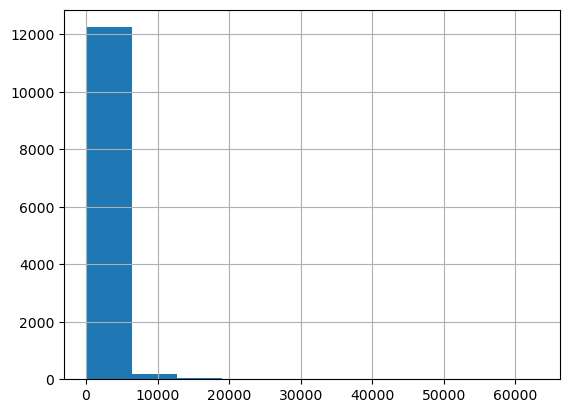

In [14]:
df['Price'].hist();
#prices of most of the products are well within 20000 range.

In [15]:
def convert(text):
    return text.lower()

df['ProductName'] = df['ProductName'].apply(convert)
df['Description'] = df['Description'].apply(convert)

In [16]:
df['ProductName'][69]

'peter england men black briefs piwbk9146012'

### Building a basic-recommendation system:

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000,stop_words='english')

In [18]:
vectors = tfidf.fit_transform(df['Description']).toarray()

In [19]:
vectors.shape

(12491, 5000)

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

In [21]:
#Top 5 smimilar productname for the firstproduce
sorted(list(enumerate(similarity[0])),reverse=True,key= lambda x: x[1] )[1:6]

[(273, 0.9740866397720671),
 (497, 0.9725340896933689),
 (853, 0.9700024974916994),
 (123, 0.9580868100284031),
 (141, 0.9565673515145983)]

In [22]:
def recommend(prod):
    prod_index = df[df['ProductName'] == prod].index[0]
    distance = similarity[prod_index]
    prod_list = sorted(list(enumerate(distance)),reverse=True,key= lambda x: x[1] )[1:6]
    for i in prod_list:
        print(df.iloc[i[0]].ProductName)

### Recommend 5 products based on the Productname:

In [23]:
recommend("ethnovogue women beige & grey made to measure custom made kurta set with jacket")

ethnovogue women black made to measure solid kurta with palazzos & dupatta
ethnovogue women teal green & beige embroidered kurti with sharara & dupatta
ethnovogue beige & peach-coloured embroidered made to measure kurta with churidar
ethnovogue women green & pink printed kurta with palazzos & dupatta
ethnovogue women sea green embroidered kurti with palazzos & dupatta


In [24]:
recommend("peter england men black briefs piwbk9146012")

peter england men pink & blue striped briefs piwbph9186011
peter england men set of 2 briefs piwbbkgm9016001
marks & spencer men pack of 3 black briefs t145234ablack
peter england men maroon solid briefs piwbmr9166012
tommy hilfiger men pack of 3 solid black briefs a9ab1129
